In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.grid_search import GridSearchCV
from sklearn.decomposition import PCA
%matplotlib inline

/home/anya/.local/lib/python3.4/site-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


# Считывание данных

In [2]:
with open('winequality-red.txt') as fin:
    data = []
    for line in fin:
        line = line.split(';')
        line = [float(item) for item in line]
        data.append(np.array(line))

In [3]:
data = np.array(data)

In [4]:
X = data[:,:-1]

#C PCA: Применяем PCA с двумя компонентами к выборке

In [5]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X)

In [7]:
y_train = data[:,-1] > 5
y_train = y_train * 1.

# Функции для отрисовки дерева

In [9]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=None,
           splitter='best')

In [10]:
def generate_grid(train_sample, border=1, step=0.05):
    return np.meshgrid(np.arange(min(train_sample[:, 0]) - border, max(train_sample[:, 1]) + border, step), 
                       np.arange(min(train_sample[:, 1]) - border, max(train_sample[:, 1]) + border, step))

In [11]:
def create_picture(X_train, y_train, model, border=1, step=0.05, cmap='summer', 
                   alpha=1, create_new_figure=True, figsize=(10, 5)):
    
    # Создание сетки
    grid = generate_grid(X_train, border, step)
    grid_ravel = np.c_[grid[0].ravel(), grid[1].ravel(0)]  # Выворачивание сетки
    
    # Предсказание значений для сетки
    grid_predicted_ravel = model.predict(grid_ravel)
    grid_predicted = grid_predicted_ravel.reshape(grid[0].shape)  # Подгоняем размер
    
    
    # Построение фигуры
    if create_new_figure:
        plt.figure(figsize=figsize)
        
    plt.pcolormesh(grid[0], grid[1], grid_predicted, cmap=cmap)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=alpha, cmap=cmap)
    plt.xlim((min(grid_ravel[:, 0]), max(grid_ravel[:, 0])))
    plt.ylim((min(grid_ravel[:, 1]), max(grid_ravel[:, 1])))
    plt.title('max_depth = ' + str(model.get_params()['max_depth']) + \
              ', min_samples_leaf = ' + str(model.get_params()['min_samples_leaf']))
    plt.xlabel('$x_0$')
    plt.ylabel('$x_1$')
    
    if create_new_figure:
        plt.show()

## Без ограничения на глубину - переобучились

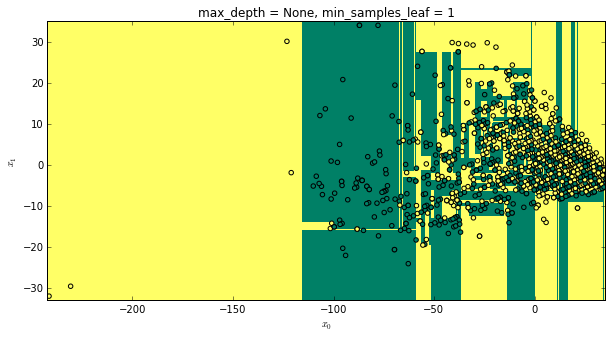

In [12]:
create_picture(X_train, y_train, model)

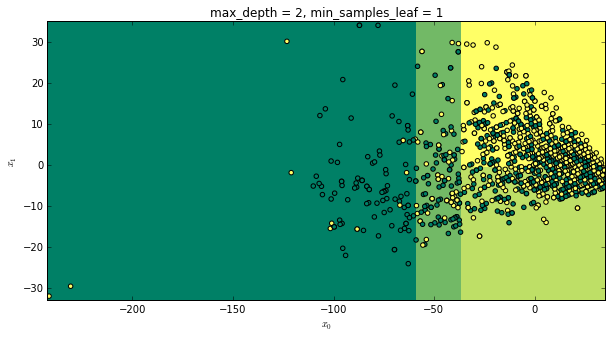

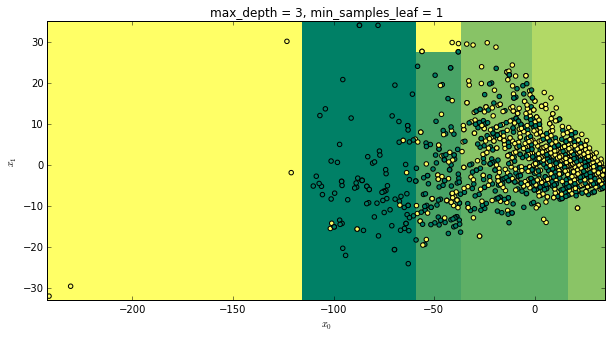

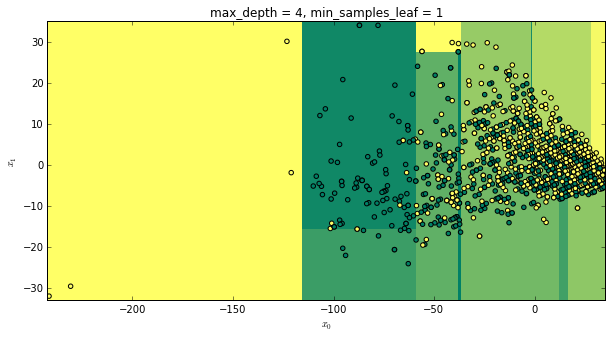

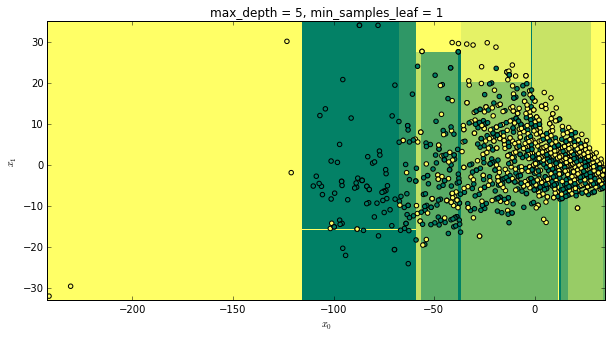

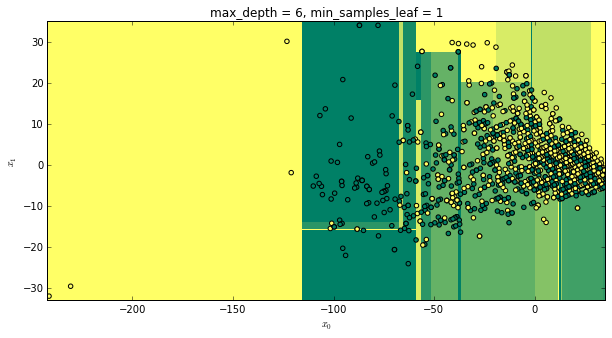

In [27]:
for k in range(2,7):
    model2 = DecisionTreeRegressor(max_depth=k)
    model2.fit(X_train, y_train)
    create_picture(X_train, y_train, model2)

#Визуализация деревьев 

In [29]:
import IPython.display
from sklearn.tree import export_graphviz
import subprocess

def draw_decision_tree(model, file_name, feature_names=None):
    export_graphviz(model, out_file=file_name + '.dot', feature_names=feature_names)
    #print('Create file ' + file_name + '.dot')

    PIPE = subprocess.PIPE
    p = subprocess.Popen('dot -Tpng ' + file_name + '.dot -o ' + file_name + '.png', shell=True, 
                         stdin=PIPE, stdout=PIPE, stderr=subprocess.STDOUT, close_fds=True)
    print(p.stdout.read())
    #print('Create file ' + file_name + '.png')

    image = IPython.display.Image(file_name + '.png')
    IPython.display.display(image)

In [30]:
draw_decision_tree(model, 'tree1.png')

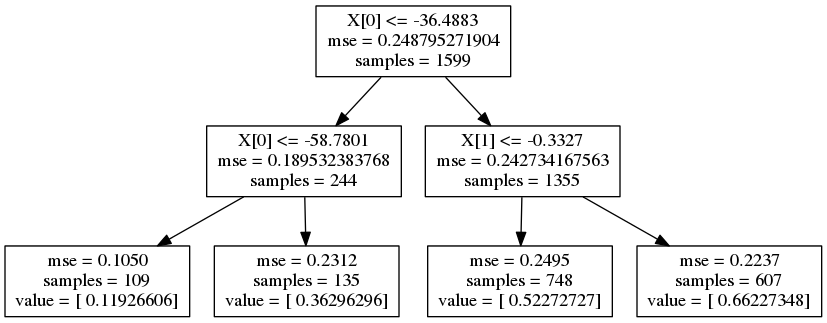

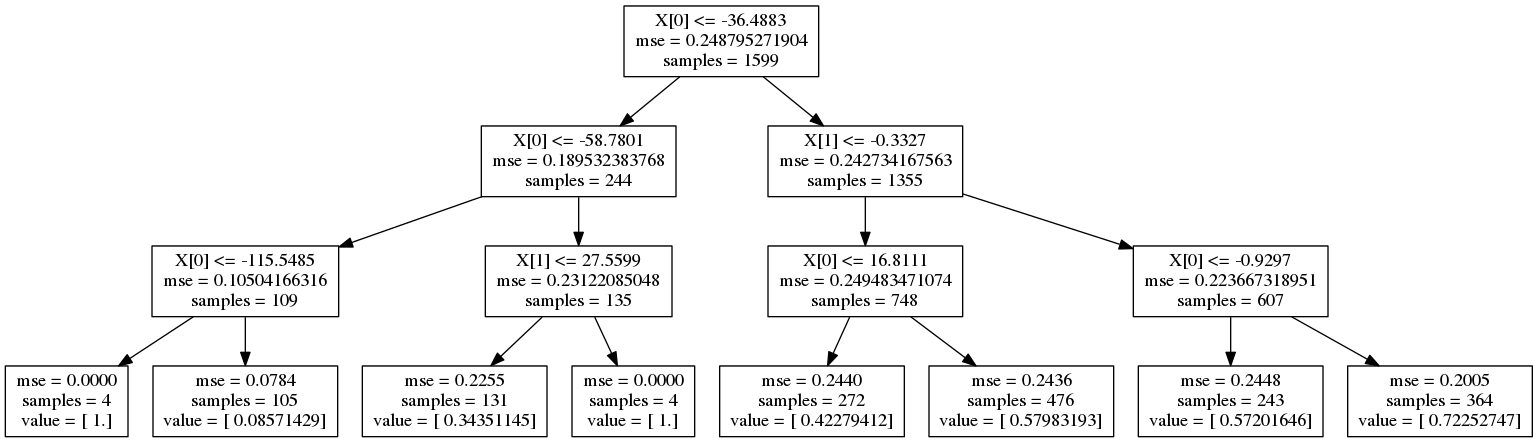

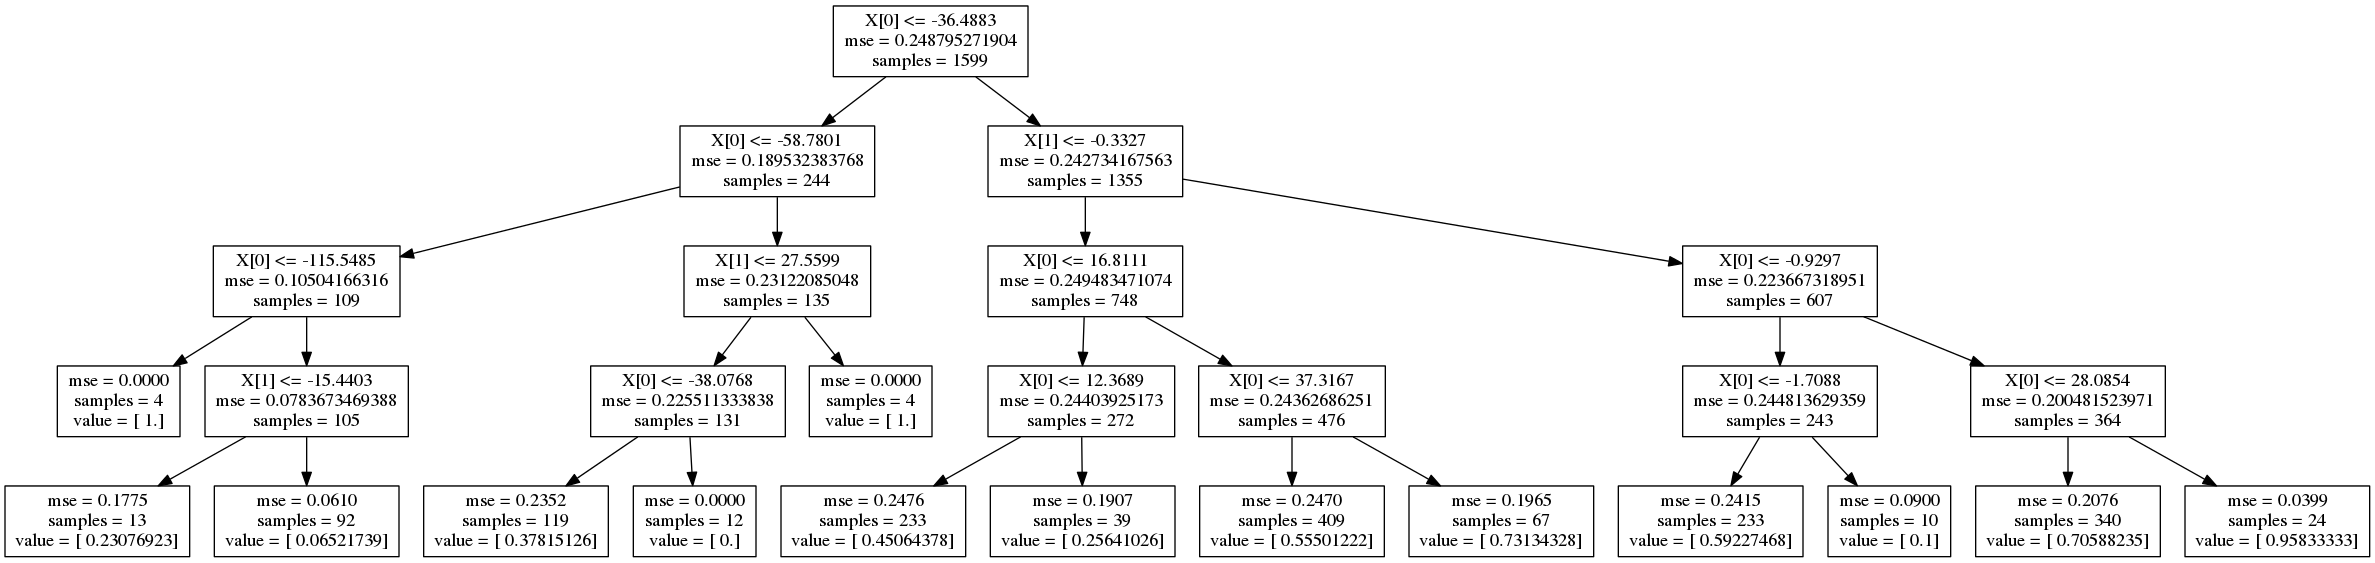

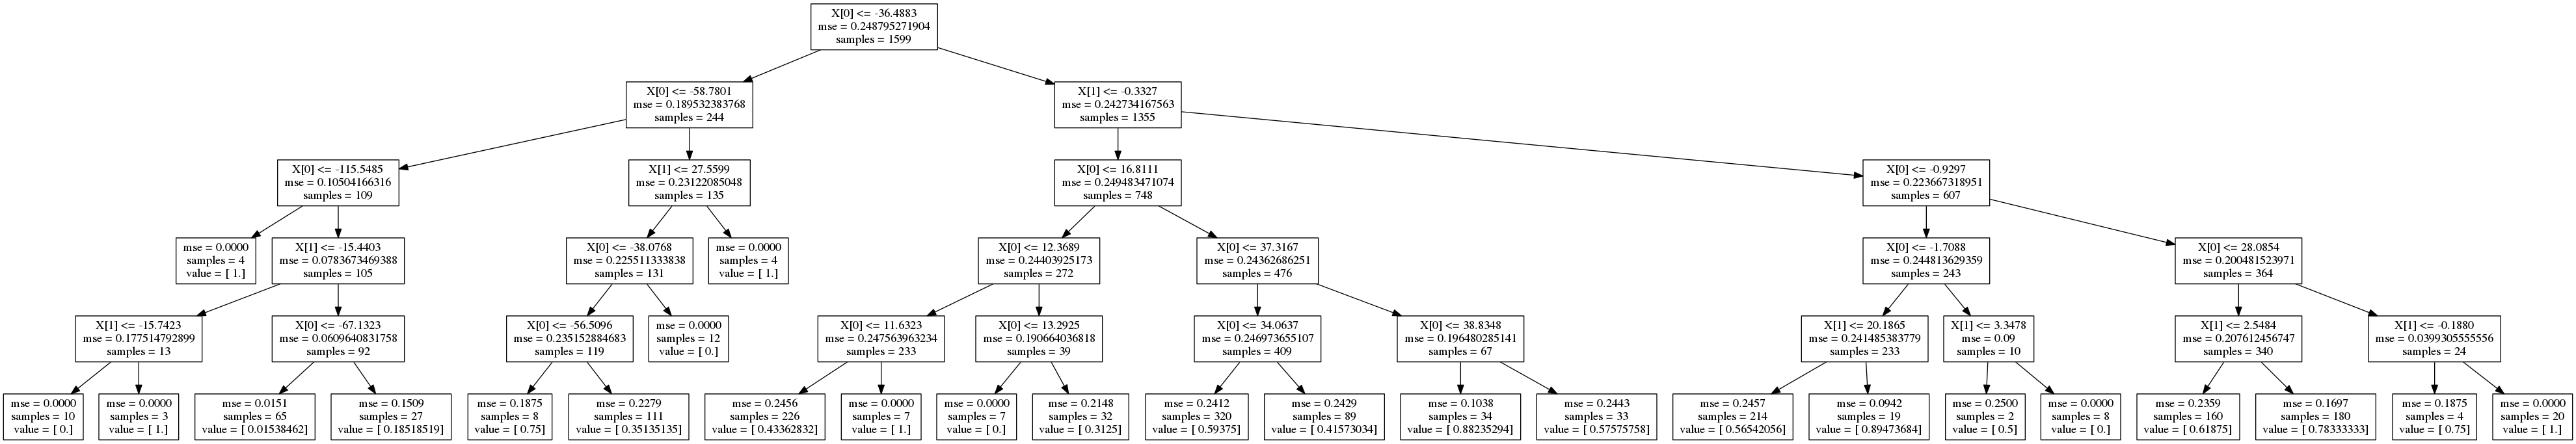

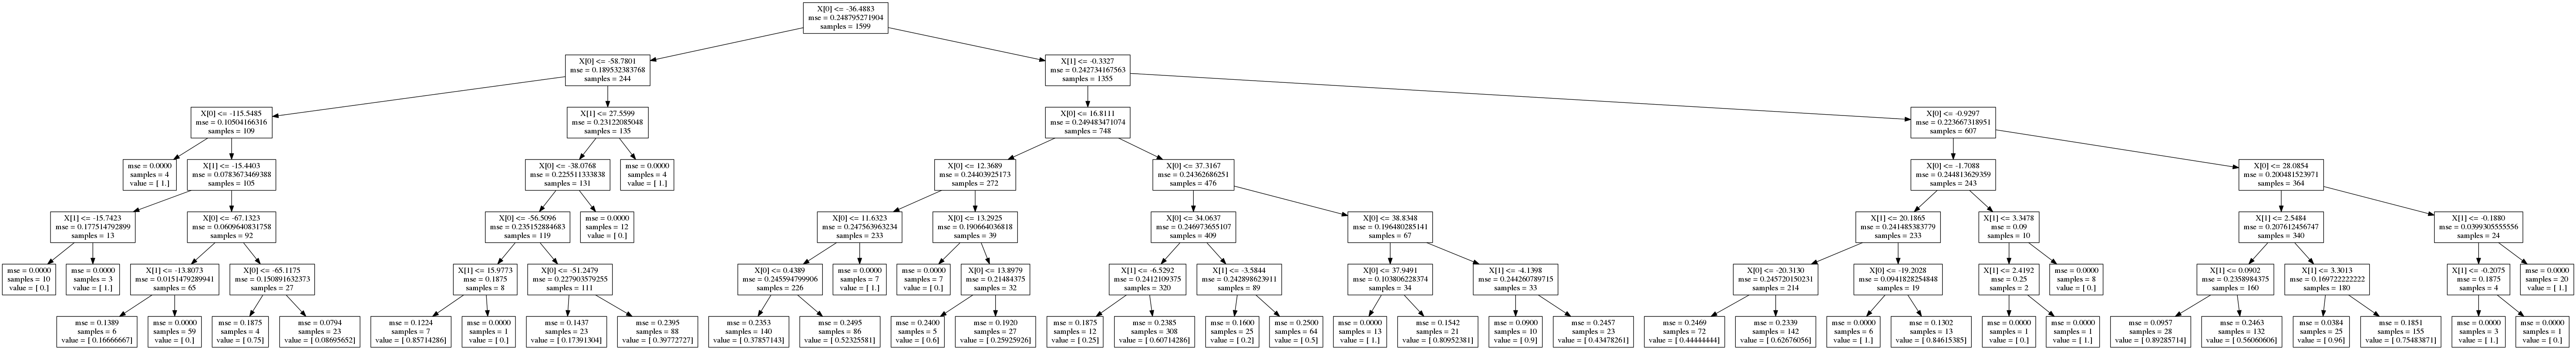

In [31]:
for k in range(2,7):
    model2 = DecisionTreeRegressor(max_depth=k)
    model2.fit(X_train, y_train)
    draw_decision_tree(model2, 'tree.png')

# Без PCA

In [34]:
X_train = data[:,:-1]
y_train = data[:,-1] > 5
y_train = y_train * 1.

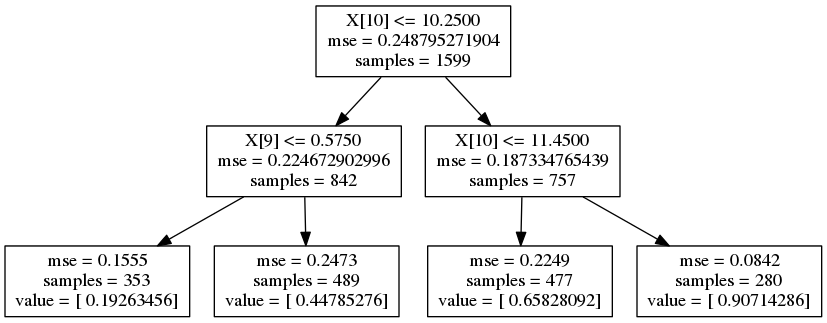

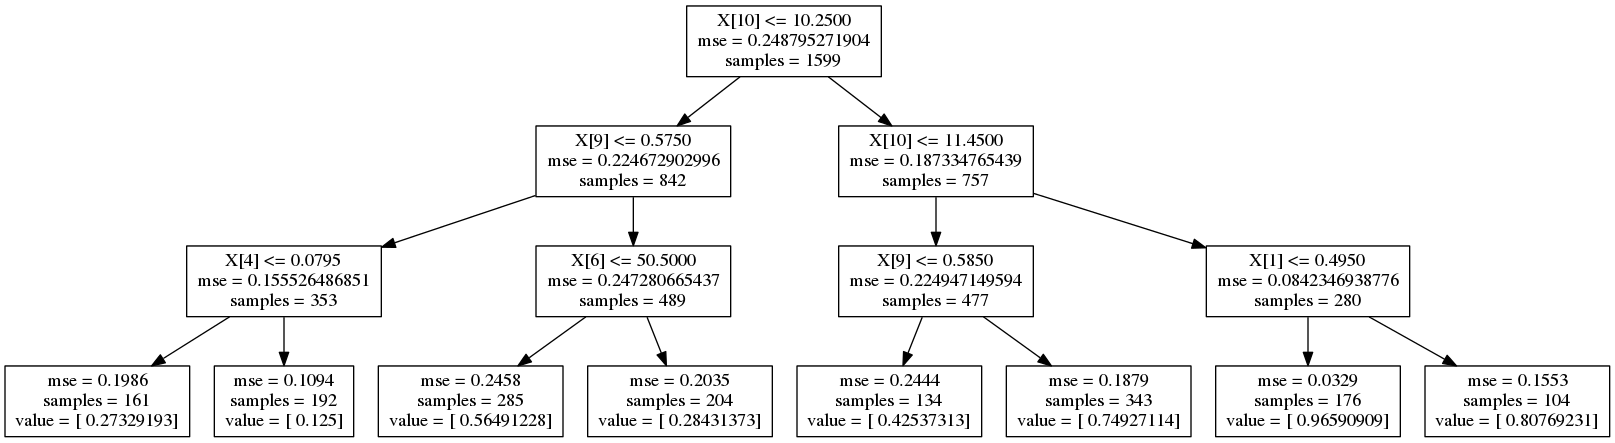

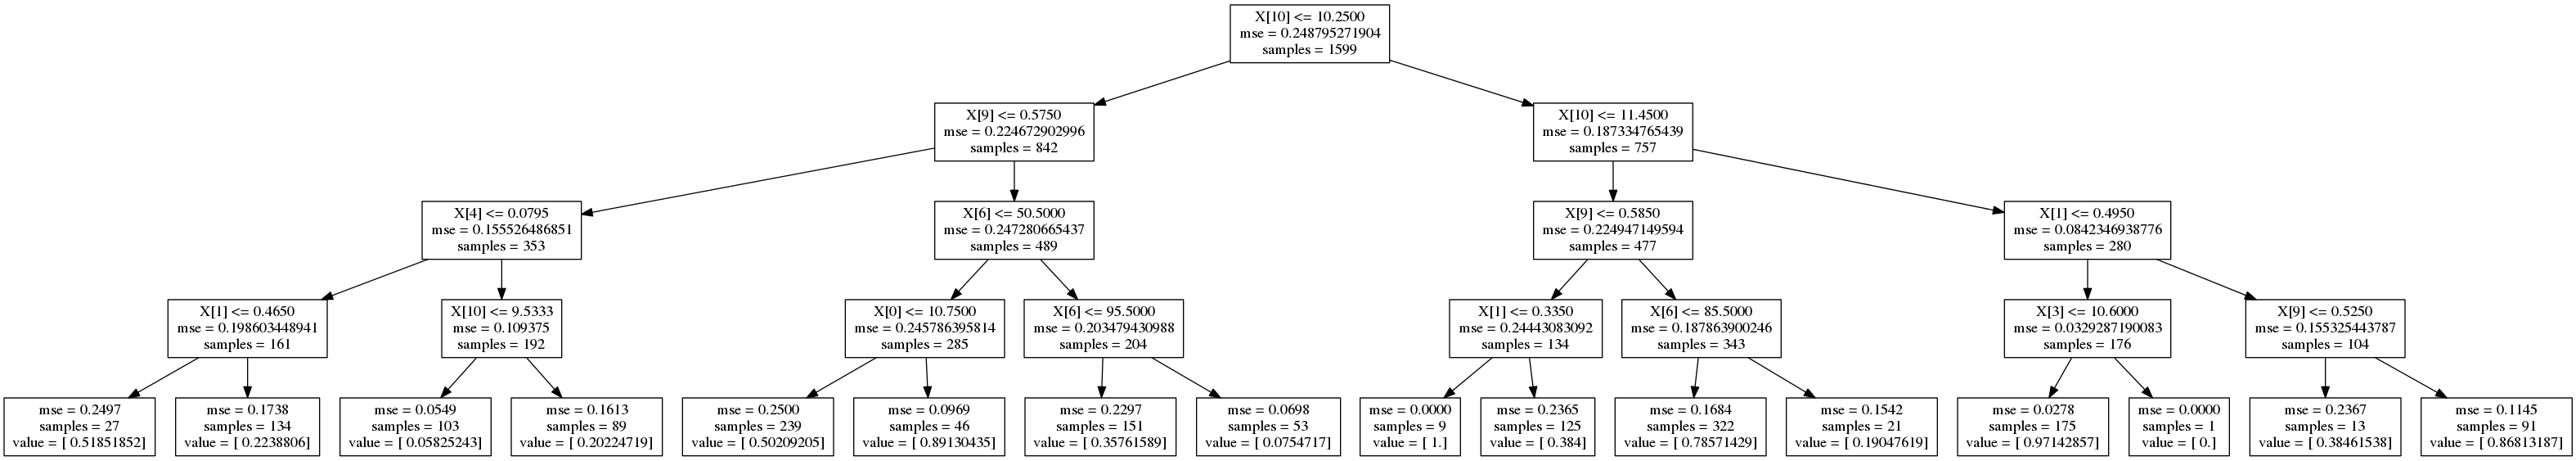

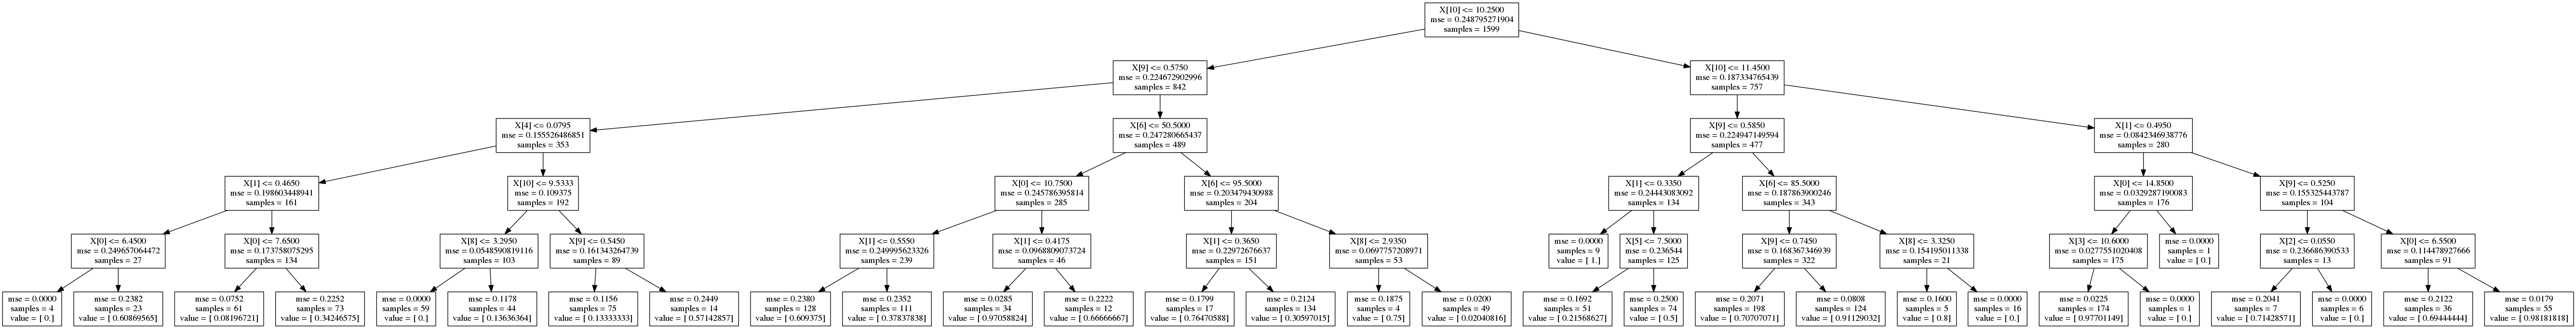

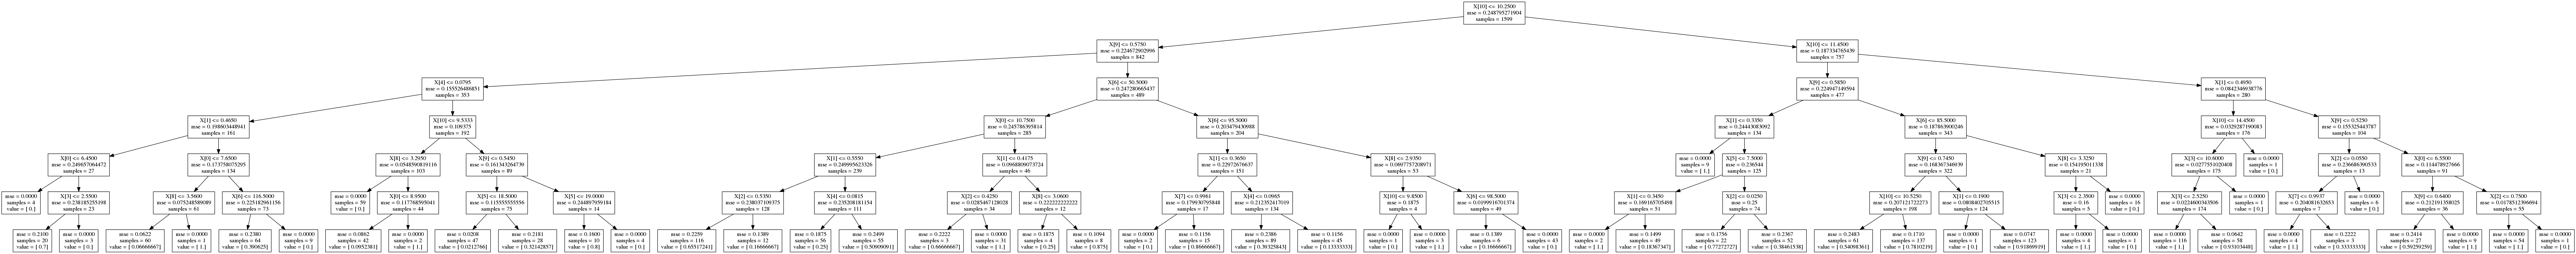

In [35]:
for k in range(2,7):
    model2 = DecisionTreeRegressor(max_depth=k)
    model2.fit(X_train, y_train)
    draw_decision_tree(model2, 'tree.png')